We'll take a dataset of documents in several different categories, and find topics (consisting of groups of words) for them. Knowing the actual categories helps us evaluate if the topics we find make sense.

We will try this with two different matrix factorizations: **Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF)**

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

### Data setup

Scikit Learn comes with a number of built-in datasets, as well as loading utilities to load several standard external datasets. This is a great resource, and the datasets include Boston housing prices, face images, patches of forest, diabetes, breast cancer, and more. We will be using the newsgroups dataset.

Newsgroups are discussion groups on Usenet, which was popular in the 80s and 90s before the web really took off. This dataset includes 18,000 newsgroups posts with 20 topics.

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [4]:
newsgroups_train.filenames[:3]

array(['/Users/princegrover/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38816',
       '/Users/princegrover/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/83741',
       '/Users/princegrover/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61092'],
      dtype='<U100')

In [5]:
newsgroups_train.target[:3]

array([1, 3, 2])

In [6]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [7]:
# topic from computer graphics
print('\n'.join(newsgroups_train.data[:1]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


In [8]:
# topic about religion talk or miscellanious

print('\n'.join(newsgroups_train.data[1:2]))



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.


In [9]:
# topic about sci space
# definition of *perijove* is the point in the orbit of a satellite of Jupiter nearest the planet's center 

print('\n'.join(newsgroups_train.data[2:3]))


 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) 

MB>                                                             So the
MB> 1970 figure seems unlikely to actually be anything but a perijove.

JG>Sorry, _perijoves_...I'm not used to talking this language.

Couldn't we just say periapsis or apoapsis?

 


In [10]:
newsgroups_train.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [11]:
# confirming from target names

np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

Next, scikit learn has a method that will extract all the word counts for us.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [14]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

`columns` represent unique words  
`rows` represent number of documents   
`cells` represent number of occurence of word in document i  

In [15]:
# get all words unique words from corpus of docs
vocab = np.array(vectorizer.get_feature_names())

In [16]:
vocab

array(['00', '000', '0000', ..., 'zware', 'zwarte', 'zyxel'], dtype='<U80')

In [17]:
vocab.shape

(26576,)

In [18]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

### Singular Value Decomposition

We would clearly expect that the words that appear most frequently in one topic would appear less frequently in the other - otherwise that word wouldn't make a good choice to separate out the two topics. Therefore, we expect the topics to be orthogonal.

The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (orthogonal topics) (along with a diagonal matrix, which contains the relative importance of each factor).

<img src="https://research.fb.com/wp-content/uploads/2016/11/post00049_image0001.png" alt="" style="width: 60%"/>

(source: [Facebook Research: Fast Randomized SVD](https://research.fb.com/fast-randomized-svd/))

In [19]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 8s, sys: 2.99 s, total: 1min 11s
Wall time: 47.3 s


In [49]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


`s` are singular values in decreasing order

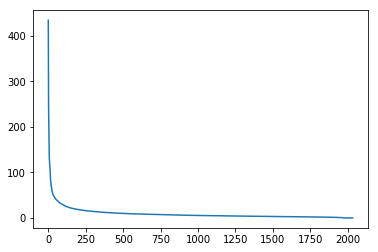

In [50]:
plt.plot(s);

#### Topics

In [20]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [25]:
show_topics(Vh[:10])

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

We can see that topics are telling something. For example,   
`Topic 10` is related to `physics and space`.  
`Topic 3` is related to `computer graphics`.  
`topic 2` is related to `image quality` etc.


### Non Negative Matrix Factorization

<img src="https://sanghosuh.github.io/lens_nmf-icdm/img/nmf.png" alt="NMF on documents" style="width: 80%"/>
(source: [NMF Tutorial](http://perso.telecom-paristech.fr/~essid/teach/NMF_tutorial_ICME-2014.pdf))

<img src="https://cdn-images-1.medium.com/max/720/1*MLJVWz4EdOFsqhvBxEi9iA.png">

#### nmf on sklearn

In [26]:
m,n=vectors.shape
d=5  # num topics. to be chosen 

In [27]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [23]:
def display_topics(model, n_top):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(' '.join(vocab[i] for i in topic.argsort()[:-n_top:-1]), '\n')

In [28]:
# no_top_words = 10
# display_topics(nmf, tfidf_feature_names, no_top_words)

In [29]:
vocab

array(['00', '000', '0000', ..., 'zware', 'zwarte', 'zyxel'], dtype='<U80')

for each topic, words with highest weight represent that topic. We can visualize top k words of each topic and see whether that topic makes sense or not

In [30]:
clf.components_[0].argsort()[:-5:-1] # last 6 except the last one

array([13816, 12642, 11163, 10286])

In [31]:
clf.components_

array([[0.12126083, 0.        , 0.        , ..., 0.00003202, 0.00006403,
        0.00028996],
       [0.11928575, 0.12085267, 0.00016592, ..., 0.0001165 , 0.000233  ,
        0.05186412],
       [0.05766391, 0.48160644, 0.0007993 , ..., 0.00028762, 0.00057525,
        0.        ],
       [0.        , 0.14794335, 0.        , ..., 0.00006585, 0.0001317 ,
        0.        ],
       [0.12742192, 0.19356417, 0.00050472, ..., 0.        , 0.        ,
        0.        ]])

In [32]:
display_topics(clf, 10)

Topic 0:
jpeg image gif file color images format quality version 

Topic 1:
edu graphics pub mail 128 ray ftp send 3d 

Topic 2:
space launch satellite nasa commercial satellites year market data 

Topic 3:
jesus god people matthew atheists does atheism said just 

Topic 4:
image data available software processing ftp edu analysis images 



For all 5 topics, top 5 words with highest weights

In [33]:
clf.reconstruction_err_

683.3993486212418

### NMF Using TF-IDF

[Topic Frequency-Inverse Document Frequency](http://www.tfidf.com/) (TF-IDF) is a way to normalize term counts by taking into account how often they appear in a document, how long the document is, and how commmon/rare the term is.

TF = (# occurrences of term t in document) / (# of words in documents)

IDF = log(# of documents / # documents with term t in it)

In [34]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [35]:
vectors_tfidf.shape # 2034 files and 26576 unique words in corpus

(2034, 26576)

We basically normalized the number of occurences b/w 0 and 1 and this can give better topics as compares to BoW approach

In [44]:
vectors.min(), vectors.max()

(0, 232)

In [42]:
vectors_tfidf.min(), vectors_tfidf.max()

(0.0, 1.0)

In [36]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [37]:
display_topics(clf, 10)

Topic 0:
people don think just like objective say morality know 

Topic 1:
graphics thanks files image file program windows know format 

Topic 2:
space nasa launch shuttle orbit moon lunar earth station 

Topic 3:
ico bobbe tek beauchaine bronx manhattan sank queens vice 

Topic 4:
god jesus bible believe christian atheism does belief faith 



In [38]:
clf.reconstruction_err_

43.712926057952814

We can use both tf-idf and countvectorizer to create topics using above NMF. TF-IDF is supposes to have richer information as we are normalizing the numbers and taking into account frequently occuring numbersm/

### End